# Experiment 12 - calculate PS as a function of pretraining epochs


`~/miniconda3/bin/python experiment12_zeroshot_reviewerFixedPretrainingEpochsXcalculatePS.py --pretraining --rule2pretraining --cuda --simstart 0 --nsimulations 40 --pretrain_epochs 5`

In [2]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)
plt.rcParams['font.sans-serif'] = "Arial"
import h5py
import nibabel as nib
import os

In [3]:
datadir = '../../data/model_results/experiment12/'

# figuredir = '../figures/manuscriptFigures_v2/SFig_ReversedPretraining/'
figuredir = '../manuscripts/neurips2022/figures/SFig_PSthroughPretraining/'


palette = sns.color_palette("Set2")


# Load data

In [5]:
# num_epochs = [10, 20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
num_epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120, 130, 140, 150,160,170,180,190, 200, 210,220,230,240, 250,260,270,280,290, 300] #, 350, 400, 450, 500]
# num_epochs = [100, 200, 300, 400, 500, 600, 700, 800, 900,1000]
simstart = 0 
simend = 40

#
df = pd.read_csv(datadir + 'expt12_adam_zeroshot_2layers_pretraining' + str(num_epochs[0]) + '_2rulepretraining' + str(num_epochs[0]) + '_simData' + str(simstart) + '.csv')
df.insert(len(df.columns),"Simulation",list(np.repeat(simstart,len(df))),True)
df.insert(len(df.columns),"Layers",list(np.repeat(2,len(df))),True)
df.insert(len(df.columns),"Training",list(np.repeat('Combined',len(df))),True)
df.insert(len(df.columns),"NumEpochs",list(np.repeat(num_epochs[0],len(df))),True)

for epoch in num_epochs:
    for i in range(simstart+1,simend):
            ####
            # 2 layers
            #
            tmp = pd.read_csv(datadir + 'expt12_adam_zeroshot_2layers_pretraining' + str(epoch) + '_2rulepretraining' + str(epoch) + '_simData' + str(i) + '.csv')
            tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
            tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
            tmp.insert(len(tmp.columns),"Training",list(np.repeat('Combined',len(tmp))),True)
            tmp.insert(len(tmp.columns),"NumEpochs",list(np.repeat(epoch,len(tmp))),True)
            tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
            tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
            tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
            tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
            df = df.append(tmp)

df.Accuracy = df.Accuracy.values*100.0

# df_adam0.Accuracy = df_adam0.Accuracy.values*100.0
# df_adam0_1rule.Accuracy = df_adam0_1rule.Accuracy.values*100.0
# df_adam0_nopretraining.Accuracy = df_adam0_nopretraining.Accuracy.values*100.0
# df_all['Training'] = df_all['Training'].replace({'Concept pretraining': 'Primitives pretraining'})

In [24]:
np.arange(0,len(num_epochs)+1,5)

array([ 0,  5, 10, 15, 20, 25, 30])

In [23]:
np.arange(0,301,50)

array([  0,  50, 100, 150, 200, 250, 300])

In [27]:
np.arange(10,301,50)

array([ 10,  60, 110, 160, 210, 260])

In [48]:
tmp_x = num_epochs[::4].append(300)

In [52]:
num_epochs[::5]

[10, 60, 110, 160, 210, 260]

In [50]:
tmp_x

In [40]:
[np.arange(0,len(num_epochs),5),29]

[array([ 0,  5, 10, 15, 20, 25]), 29]

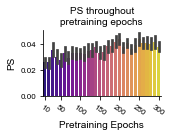

In [74]:
xticks = [0, 4, 9, 14, 19 ,24, 29]
xtick_labels = [10, 50, 100, 150, 200, 250,300]
plt.figure(figsize=(2.5,2.))
# ax = sns.boxplot(x="NumEpochs",y="PSavg",palette='plasma',data=df,sym='')
ax = sns.barplot(x="NumEpochs",y="PSavg",palette='plasma',data=df)
# sns.stripplot(x="NumEpochs",y="PSavg",palette='plasma',data=df,dodge=True,zorder=0)
plt.title('PS throughout\npretraining epochs', fontsize=10)
plt.xlabel('Pretraining Epochs', fontsize=10)
plt.ylabel('PS', fontsize=10)
plt.xticks(xticks,xtick_labels,rotation=-35,fontsize=8);
plt.yticks(fontsize=8);
# plt.ylim([0.2,.5])
# handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:4], labels[0:4],fontsize=8)
# plt.ylim([-.07,.11])
sns.despine()
plt.tight_layout()
plt.savefig(figuredir + 'Expt12_ModelPS_PretrainingEpochs.png', dpi=300)
      
# t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Combined'].values[1:],df_all.PSavg[df_all.Training=='CombinedReversed'].values[1:])
# print('Combined vs. Reversed Combined PS avg')
# print('\t t =', t, '| p =', p)


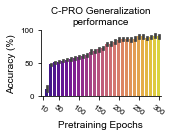

In [72]:
xticks = [0, 4, 9, 14, 19 ,24, 29]
xtick_labels = [10, 50, 100, 150, 200, 250,300]
plt.figure(figsize=(2.5,2.))
# ax = sns.boxplot(x="NumEpochs",y="Accuracy",palette='plasma',data=df,sym='')
ax = sns.barplot(x="NumEpochs",y="Accuracy",palette='plasma',data=df)
# sns.stripplot(x="NumEpochs",y="Accuracy",palette='plasma',data=df,dodge=True,zorder=0)
plt.title('C-PRO Generalization\nperformance', fontsize=10)
plt.xlabel('Pretraining Epochs', fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=10)
plt.xticks(xticks,xtick_labels,rotation=-35,fontsize=8);
plt.yticks([0,50,100],[0,50,100],fontsize=8);
# plt.ylim([0.2,.5])
# handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:4], labels[0:4],fontsize=8)
# plt.ylim([-.07,.11])
sns.despine()
plt.tight_layout()
plt.savefig(figuredir + 'Expt12_ModelAccuracy_PretrainingEpochs.png', dpi=300)
      
# t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Combined'].values[1:],df_all.PSavg[df_all.Training=='CombinedReversed'].values[1:])
# print('Combined vs. Reversed Combined PS avg')
# print('\t t =', t, '| p =', p)


In [69]:
print(stats.spearmanr(df.groupby('NumEpochs').mean().Accuracy.values,df.groupby('NumEpochs').mean().PSavg.values))
print(stats.pearsonr(df.groupby('NumEpochs').mean().Accuracy.values,df.groupby('NumEpochs').mean().PSavg.values))
r, p = stats.spearmanr(df.groupby('NumEpochs').mean().Accuracy.values,df.groupby('NumEpochs').mean().PSavg.values)

SpearmanrResult(correlation=0.8723025583982202, pvalue=3.38212050829734e-10)
(0.8771938022993999, 2.020036528243862e-10)


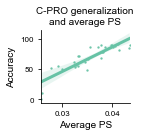

In [73]:
df_tmp = df.groupby('NumEpochs').mean()
plt.figure(figsize=(2.,2.))
ax = sns.regplot(x="PSavg",y="Accuracy",data=df_tmp,line_kws={'linewidth':3}, color=sns.color_palette('Set2')[0], scatter_kws={'s':2,'color':sns.color_palette('Set2')[0]})
plt.xlabel('Average PS',fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('C-PRO generalization\nand average PS',fontsize=10)
# ax.annotate('$\rho=$' + str(r),fontsize=50) 
# plt.legend(fontsize=8,borderaxespad=0.3,borderpad=0.3,labelspacing=0.1,handlelength=0.5)
# plt.ylim([-5,10])
# plt.xlim([-0.13,0.13])
sns.despine()
plt.tight_layout()
plt.savefig(figuredir + 'Expt12_PretrainingPSxAccuracy.png', dpi=300)
